In [1]:
import astrodash

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
from sklearn.metrics import confusion_matrix
import os
import astropy
import numpy as np
from astropy.table import Table
from astropy.table import Column
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
sample_location = "/home/hallflower/sample/spectra/"
dash = "/mnt/c/users/20xha/Documents/Caltech/Research/DASH/"

In [4]:
SEDM_ML_sample = Table.read("/mnt/c/Users/20xha/Documents/Caltech/Research/SEDM_ML_sample.ascii", format = "ascii")
SEDM_ML_sample.rename_column('col1', 'ZTF_Name')
SEDM_ML_sample.rename_column('col2', "Class")
SEDM_ML_sample.rename_column('col8', "Version")

In [5]:
output_list = np.load(dash+"output.npy",allow_pickle=True)

In [37]:
final_rcf_table = Table.from_pandas(pd.read_hdf("/mnt/c/users/20xha/Documents/Caltech/Research/final_rcf_table.h5"))

In [6]:
len(output_list)

2959

In [7]:
len(np.unique(SEDM_ML_sample["ZTF_Name"]))

2968

In [8]:
np.asarray(output_list[0][2])[:,0]

array(['Ia-91bg', 'Ia-91bg'], dtype='<U7')

In [9]:
Classification = Table(
                    names=("ZTF_Name", "Class", "Version"
                    ),
                    meta={"name": "Basic ZTF Name Data"},
                    dtype=("U64", "U64", "U64"
                          )
                    )
for i in np.unique(SEDM_ML_sample["ZTF_Name"]):
    row = SEDM_ML_sample["ZTF_Name", "Class", "Version"][np.where(i == SEDM_ML_sample["ZTF_Name"])][-1]
    Classification.add_row(row)

In [10]:
count = 0
ResultsTable = Table(
                names=("ZTF_Name", "Both"
                ),
                meta={"name": "Spectrum Results after SNID"},
                dtype=("U64", "U64"
                      )
                )

for i in output_list:
    row = []
    row.append(i[-1])
    best = np.asarray(i[2])[:,0]
    c = Counter(best)
    row.append(c.most_common()[0][0])
    ResultsTable.add_row(row)

    count += 1
    if(count % 500 == 0):
        print(count)

500
1000
1500
2000
2500


In [11]:
counter = 0
wrong = []
JoinedResults = astropy.table.join(ResultsTable, Classification)
for j in JoinedResults:
    if(j["Class"] != '-' and j["Class"] != "0.0"):
        correct_1a = "Ia" in j["Class"]
        classified_1a = "Ia" in j["Both"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["Class"], j["Both"]])
wrong = np.asarray(wrong)

In [14]:
ranges = np.linspace(0, 1, 101)

In [11]:
ResultsTable_List_both = []
count = 0

for rlap in ranges:
    for agree in range(0,16):
        ResultsTable = Table(
                    names=("ZTF_Name", "Both"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
        for j in output_list:
            reliable = np.where(np.asarray(j[4]) != 'Unreliable matches')[0]
            if(len(reliable) != 0):
                matches = []
                best_rlap = float(max(j[0][:,0][:,3]))
                if(best_rlap > rlap):
                    reliable_list = j[0][reliable]
                    for k in range(len(reliable_list)):
                        matches.extend(reliable_list[k])
                    matches = np.asarray(matches)
                    c = Counter(matches[:,1])
                    if(c.most_common()[0][1] >= agree):
                        row = []
                        row.append(j[-1])
                        row.append(c.most_common()[0][0])
                        ResultsTable.add_row(row)

        count += 1
        if(len(ResultsTable) != 0):
            ResultsTable_List_both.append([rlap,agree,ResultsTable])
        if(count % 100 == 0):
            print(count)
ResultsTable_List_both_numpy = np.asarray(ResultsTable_List_both)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [12]:
ResultsTable_List_both_numpy[:,0]

array([0.0, 0.0, 0.0, ..., 0.99, 0.99, 0.99], dtype=object)

In [100]:
j = output_list[0]

In [30]:
matches = []
for k in range(len(j[0])):
    matches.extend(j[0][k])
matches = np.asarray(matches)

In [46]:
max(j[0][:,0][:,3])

'0.99912125'

In [13]:
counters_both = [] 
for i in ResultsTable_List_both_numpy:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[2], Classification)
    for j in JoinedResults:
        if(j["Class"] != '-'):
            correct_1a = "Ia" in j["Class"]
            classified_1a = "Ia" in j["Both"]
            if(correct_1a==classified_1a):
                counter += 1
            else:
                wrong.append([j["ZTF_Name"], j["Class"], j["Both"]])
    wrong = np.asarray(wrong)
    counters_both.append([i[0],i[1],counter,len(JoinedResults), wrong])
counters_both = np.asarray(counters_both)

In [14]:
low_rlap = np.where(counters_both[:,0] < 20)
counters_both[low_rlap][np.argmax(counters_both[low_rlap][:,2]/counters_both[low_rlap][:,3])]

array([0.0, 11, 178, 225,
       array([['ZTF18aaunfqq', 'Ia', 'Ic-broad'],
       ['ZTF18abcrxoj', 'Ia', 'Ic-broad'],
       ['ZTF18abfgkgn', 'Q', 'Ia-norm'],
       ['ZTF18abgladq', 'II', 'Ia-norm'],
       ['ZTF18abokyfk', 'II', 'Ia-norm'],
       ['ZTF18acbxudr', 'II', 'Ia-norm'],
       ['ZTF19aadttht', 'Ic', 'Ia-norm'],
       ['ZTF19aanijpu', 'Ic', 'Ia-91bg'],
       ['ZTF19aaokist', 'Ia', 'Ic-broad'],
       ['ZTF19aatesgp', 'IIb', 'Ia-norm'],
       ['ZTF19aatgsdl', 'Ia', 'Ib-norm'],
       ['ZTF19aavitlq', 'Ia-91bg', 'Ic-broad'],
       ['ZTF19aawmqtd', 'Ia', 'Ic-broad'],
       ['ZTF19aaxfzao', 'Ia', 'Ic-broad'],
       ['ZTF19abdmfgf', 'Ia', 'Ic-norm'],
       ['ZTF19abfdszw', 'Ia', 'Ib-norm'],
       ['ZTF19abfibel', 'Ia', 'Ib-norm'],
       ['ZTF19abidbqp', 'Ia-02ic', 'Ic-broad'],
       ['ZTF19abiszoe', 'IIn', 'Ia-norm'],
       ['ZTF19abqhobb', 'II', 'Ia-norm'],
       ['ZTF19abqsojs', 'Ia-91T', 'Ic-broad'],
       ['ZTF19acajpre', 'Ia', 'Ic-broad'],
       ['ZTF19acaqo

In [15]:
counters_both[np.where(counters_both[:,2] == counters_both[:,3])]

array([], shape=(0, 5), dtype=object)

Text(0.5, 0, 'accuracy')

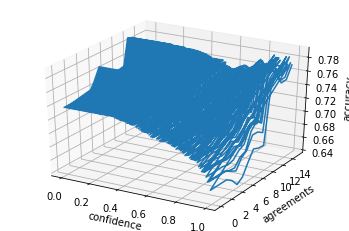

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(counters_both[:,0], counters_both[:,1], counters_both[:,2]/counters_both[:,3])
ax.set_xlabel("confidence")
ax.set_ylabel("agreements")
ax.set_zlabel("accuracy")

In [33]:
np.asarray(output_list[0][2])[:,2]

array(['0.9991', '0.9991'], dtype='<U7')

In [15]:
ResultsTable_List_confidence = []
for rlap in ranges:
    count = 0
    ResultsTable = Table(
                    names=("ZTF_Name", "Dash", "Confidence",
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64", "float64",
                          )
                    )

    for i in output_list:
        row = []
        row.append(i[-1])
        reliable = np.where(np.asarray(i[4]) != 'Unreliable matches')[0]
        if(len(reliable) != 0):
            best = np.asarray(i[2])[:,0][reliable]
            c = Counter(best)
            best_rlap = float(min(np.asarray(i[2])[:,2][reliable]))
            if(best_rlap > rlap):
                row.append(c.most_common()[0][0])
                row.append(best_rlap)
                ResultsTable.add_row(row)

        count += 1
    if(count % 50 == 0):
        print(count)
            
    if(len(ResultsTable) != 0):
        ResultsTable_List_confidence.append([rlap,ResultsTable])

In [16]:
ResultsTable_List_confidence = np.asarray(ResultsTable_List_confidence)

In [38]:
counters_confidence = [] 
for i in ResultsTable_List_confidence:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        if(j["sn_type"] != '-'):
            correct_1a = "Ia" in j["sn_type"]
            classified_1a = "Ia" in j["Dash"]
            if(correct_1a==classified_1a):
                counter += 1
            else:
                wrong.append([j["ZTF_Name"], j["sn_type"], j["Dash"]])
    wrong = np.asarray(wrong)
    counters_confidence.append([i[0],counter,len(JoinedResults), wrong])
counters_confidence = np.asarray(counters_confidence)

In [39]:
low_rlap = np.where(counters_confidence[:,0] < 20)
Table(counters_confidence[low_rlap][np.argmax(counters_confidence[low_rlap][:,1]/counters_confidence[low_rlap][:,2])][3]).to_pandas().to_csv(dash+"verwrong.csv")
wronglist = counters_confidence[low_rlap][np.argmax(counters_confidence[low_rlap][:,1]/counters_confidence[low_rlap][:,2])]

In [40]:
astropy.table.join(ResultsTable_List_confidence[0][-1], Classification)["ZTF_Name", "Class", "Dash", "Confidence"].to_pandas().to_csv(dash+"confidence.csv")

(array([1.000e+00, 0.000e+00, 1.000e+00, 8.000e+00, 1.200e+01, 3.200e+01,
        3.800e+01, 5.600e+01, 1.150e+02, 1.667e+03]),
 array([0.1836 , 0.26524, 0.34688, 0.42852, 0.51016, 0.5918 , 0.67344,
        0.75508, 0.83672, 0.91836, 1.     ]),
 <a list of 10 Patch objects>)

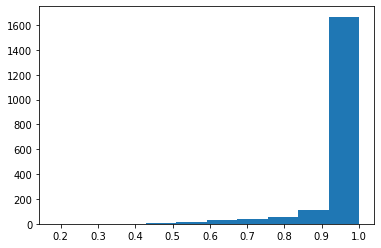

In [41]:
plt.hist(astropy.table.join(ResultsTable_List_confidence[0][-1], Classification)["Confidence"])

Text(0, 0.5, 'true positive')

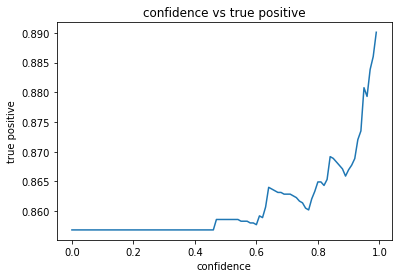

In [42]:
plt.plot(counters_confidence[:,0], counters_confidence[:,1]/counters_confidence[:,2])
plt.title("confidence vs true positive")
plt.xlabel("confidence")
plt.ylabel("true positive")

In [43]:
c = Counter(counters_confidence[-1][-1][:,-1])
wrong_list = np.flip(np.asarray(c.most_common()))
c_right = Counter(counters_confidence[-1][-1][:,1])
right_list = np.flip(np.asarray(c_right.most_common()))

Text(0.5, 1.0, 'Distribution of Incorrect Classifications')

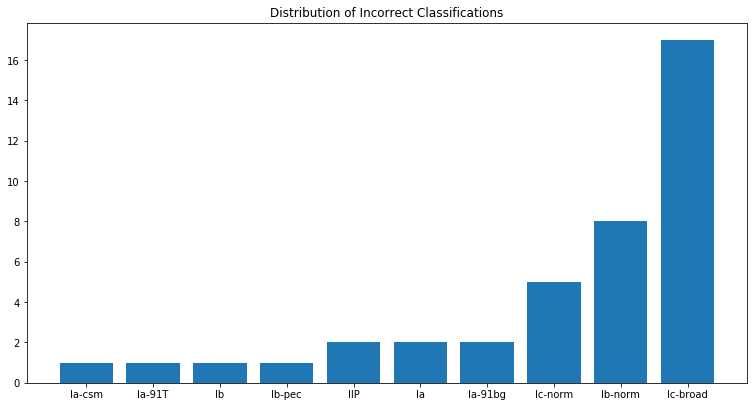

In [44]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(wrong_list[:,1], wrong_list[:,0].astype(int), label = "Wrong")
plt.title("Distribution of Incorrect Classifications")
#ax.bar(right_list[:,1], right_list[:,0].astype(int), label = "Right")

Text(0.5, 1.0, 'Distribution of Incorrect Classifications True Classes')

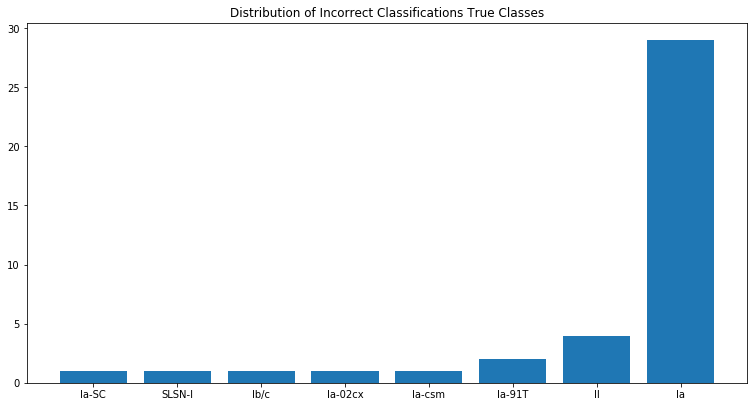

In [45]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(right_list[:,1], right_list[:,0].astype(int), label = "Right")
plt.title("Distribution of Incorrect Classifications True Classes")

In [26]:
JoinedResultsConfusion = astropy.table.join(ResultsTable_List_confidence[0][1], Classification)

In [46]:
actual_c = Counter(JoinedResultsConfusion["Class"])
actual_list = np.flip(np.asarray(actual_c.most_common()))
dash_c = Counter(JoinedResultsConfusion["Dash"])
dash_list = np.flip(np.asarray(dash_c.most_common()))

Text(0.5, 1.0, 'Distribution of Actual Classes')

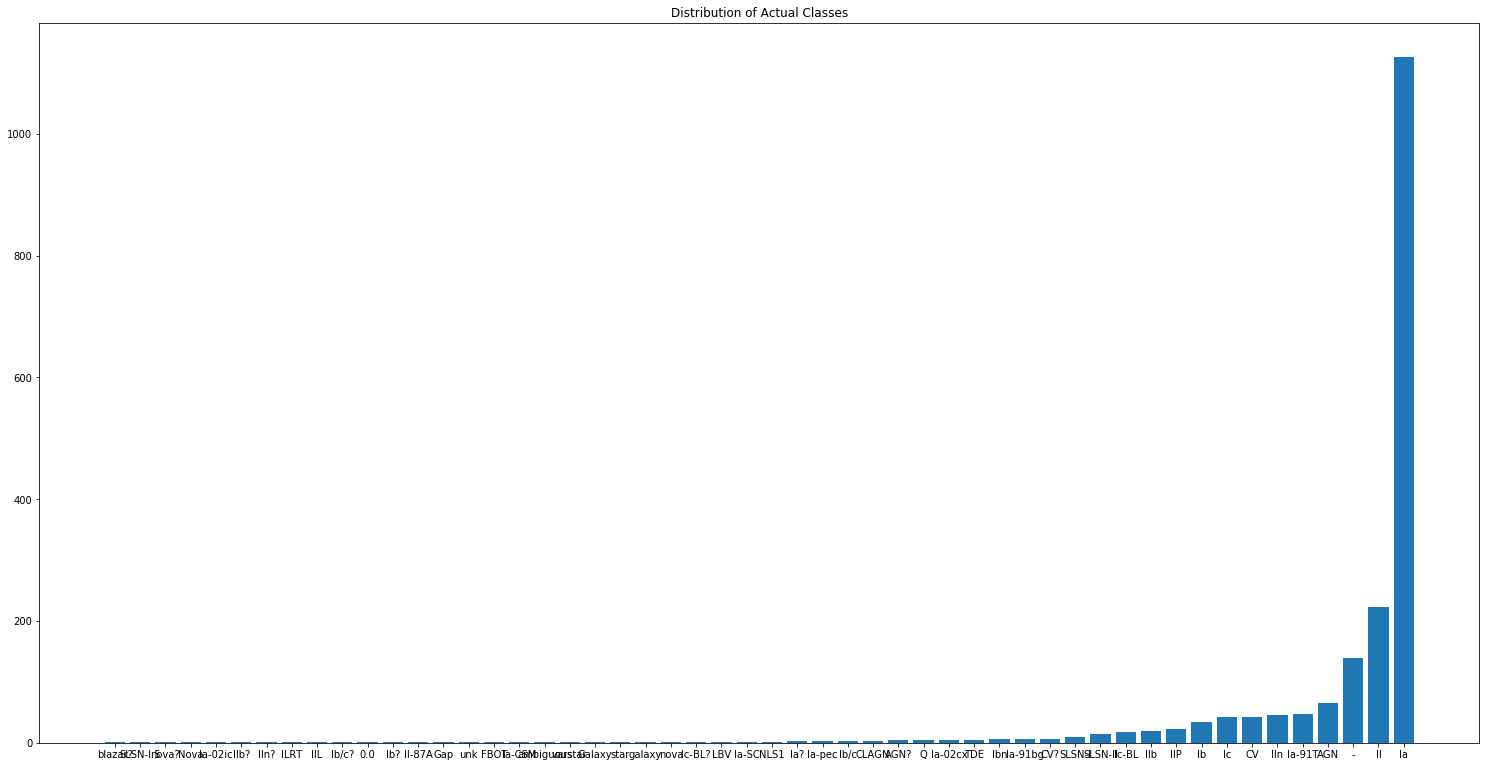

In [47]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(actual_list[:,1], actual_list[:,0].astype(int), label = "Wrong")
plt.title("Distribution of Actual Classes")

Text(0.5, 1.0, 'Distribution of Dash Classes')

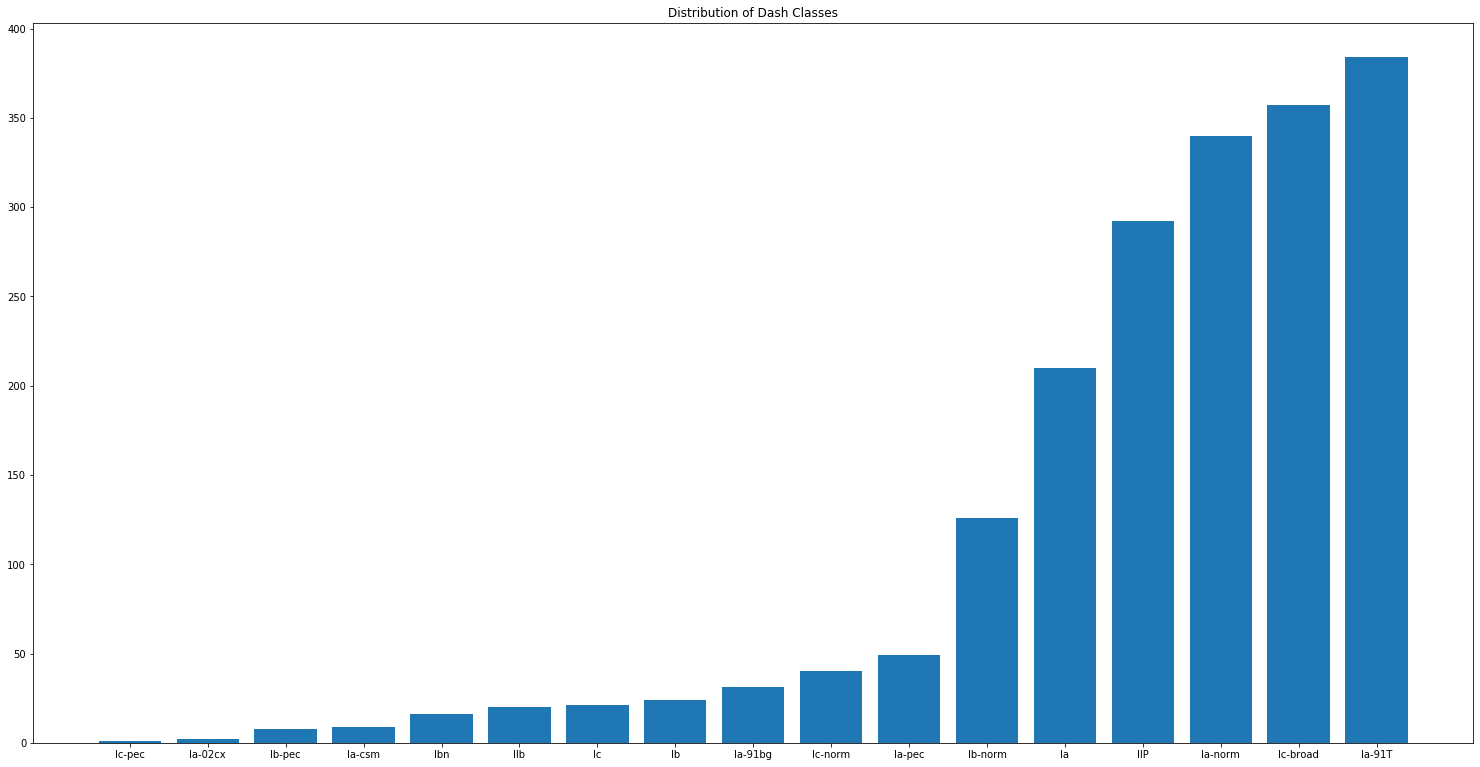

In [48]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(dash_list[:,1], dash_list[:,0].astype(int), label = "Wrong")
plt.title("Distribution of Dash Classes")

In [28]:
confusion_matrix(JoinedResultsConfusion["Class"], JoinedResultsConfusion["Dash"])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
counters_confidence_1a = [] 
for i in ResultsTable_List_confidence:
    truepositive = 0
    falsepositive = 0
    conditionpositive = 0
    conditionnegative = 0
    JoinedResults = astropy.table.join(i[1], SEDM_ML_sample)
    
    for j in JoinedResults:
        correct_1a = "Ia" in j["Class"]
        classified_1a = "Ia" in j["Both"]
        if(correct_1a and classified_1a):
            truepositive += 1
        elif(correct_1a == False and classified_1a == True):
            falsepositive += 1
    counters_confidence_1a.append([i[0],truepositive/(truepositive + falsepositive),falsepositive/(truepositive + falsepositive),len(JoinedResults)])

In [147]:
count = 0
ResultsTable = Table(
                names=("ZTF_Name", "Both"
                ),
                meta={"name": "Spectrum Results after SNID"},
                dtype=("U64", "U64"
                      )
                )

for i in output_list:
    row = []
    row.append(i[-1])
    reliable = np.where(np.asarray(i[4]) != 'Unreliable matches')[0]
    if(len(reliable) != 0):
        best = np.asarray(i[2])[:,0][reliable]
        c = Counter(best)
        row.append(c.most_common()[0][0])
        ResultsTable.add_row(row)

    count += 1
    if(count % 500 == 0):
        print(count)

500
1000
1500
2000
2500


In [149]:
counter = 0
wrong = []
JoinedResults = astropy.table.join(ResultsTable, Classification)
for j in JoinedResults:
    if(j["Class"] != '-' and j["Class"] != "0.0"):
        correct_1a = "Ia" in j["Class"]
        classified_1a = "Ia" in j["Both"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["Class"], j["Both"]])
wrong = np.asarray(wrong)

In [173]:
counter/(counter + len(wrong))

0.7784810126582279

In [174]:
Table(wrong).to_pandas().to_csv(dash + "wrong.csv")

In [175]:
len(wrong)/len(JoinedResults)

0.20114942528735633